````{admonition} Copyright 2020 The TensorFlow Authors.
```
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
```
````

# TensorFlow 基础知识

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://tensorflow.google.cn/guide/basics" class="_active_edit_href"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">转到TensorFlow.org</a>
</td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/guide/basics.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/guide/basics.ipynb">     <img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">     在 GitHub 上查看源代码</a></td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/guide/basics.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a>   </td>
</table>


本指南提供*TensorFlow 基础知识*的快速概览。本文档的每个部分都是对一个大主题的概述——您可以在每个部分的末尾找到指向完整指南的链接。

TensorFlow 是一个端到端的机器学习平台。它支持以下内容：

- 基于多维数组的数值计算（类似于<a href="https://numpy.org/" class="external">NumPy</a> 。）
- GPU 和分布式处理
- 自动微分
- 模型构造、训练和导出
- 及更多内容

In [28]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 设置日志级别为ERROR，以减少警告信息
# 禁用 Gemini 的底层库（gRPC 和 Abseil）在初始化日志警告
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "3"  # 0: INFO, 1: WARNING, 2: ERROR, 3: FATAL
os.environ["GLOG_minloglevel"] = "true"
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
!export TF_FORCE_GPU_ALLOW_GROWTH=true
from pathlib import Path

temp_dir = Path(".temp")
temp_dir.mkdir(parents=True, exist_ok=True)

## 张量

TensorFlow 对<code>tf.Tensor</code>对象表示的多维数组或<em>张量</em>进行运算。下面一个二维张量：

In [2]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


`tf.Tensor`最重要的属性是它的`shape`(形状)和`dtype`(数据类型) ：

- `Tensor.shape` ：表示张量每个轴上的大小。
- `Tensor.dtype` ：表示张量中所有元素的类型。

TensorFlow 实现了对张量的标准数学运算，以及许多机器学习的专用操作。

例如：

In [3]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [4]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [5]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [6]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [7]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [8]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

注：通常，在 TensorFlow 函数需要 `Tensor` 作为输入的任何地方，该函数也将接受可使用 `tf.convert_to_tensor` 转换为 `Tensor` 的任何内容。请参见下面的示例。

In [9]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [10]:
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

在 CPU 上运行大型计算可能会很慢。配置正确的 TensorFlow 可以使用 GPU 等加速硬件非常快速地运算。

In [11]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


详情参阅 [Tensor guide](tensor.ipynb) （张量指南）。

## 变量

普通的`tf.Tensor`对象是不可变的。要在 TensorFlow 中存储模型权重（或其他可变状态），请使用`tf.Variable` 。

In [14]:
var = tf.Variable([0.0, 0.0, 0.0])
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [15]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [16]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

详见 [Variables guide](variable.ipynb) （变量指南）。

## 自动微分

<a href="https://en.wikipedia.org/wiki/Gradient_descent" class="external"><em>Gradient descent</em></a>(梯度下降)及相关算法是现代机器学习的基础。

为此，TensorFlow 实现了自动微分 (autodiff)，它使用微积分来计算梯度。通常用它来计算模型基于其权重的*误差*或*损失*的梯度。

In [17]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [18]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

在 `x = 1.0`, `y = f(x) = (1**2 + 2*1 - 5) = -2`.

`y`的导数是 `y' = f'(x) = (2*x + 2) = 4` 。 TensorFlow 可以自动计算：

In [19]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

这个简化的例子只对单个标量 ( `x` ) 求导，但 TensorFlow 可以同时计算任意数量的非标量张量的梯度。

详见 [Autodiff guide](autodiff.ipynb) （自动微分）。

## 图和 tf.function装饰器

 TensorFlow 可以像任何 Python 库一样以交互方式使用，同时还提供以下工具：

- **性能优化**：加速训练和推理。
- **导出**：保存训练好的模型。

这就要用 `tf.function` 装饰器将纯 TensorFlow 代码与普通 Python 代码隔离开来。

In [20]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

第一次运行由`tf.function`装饰的函数时，虽然它在 Python 中执行，但它会取得经由 TensorFlow 计算的完整优化图。

In [21]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

在后续调用中，TensorFlow 仅执行优化图，跳过所有非 TensorFlow 步骤。注意下面的`my_func`不打印*Tracing*，因为`print`是 Python 函数，而不是 TensorFlow 函数。

In [22]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

输入的*签名*（`shape`和`dtype` ）不同，就不能使用原来的计算图，要生成新计算图：

In [23]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

这些取得的图提供了两个好处：

- 在许多情况下，显著提升了执行速度（虽然在上面这个例子中无关紧要）。
- 可以用`tf.saved_model`导出这些图，以便在[服务器](https://tensorflow.google.cn/tfx/serving/docker)或[移动设备](https://tensorflow.google.cn/lite/guide)等其他系统上运行，无需安装 Python。

详见 [Intro to graphs](intro_to_graphs.ipynb) （计算图的说明）.

## 模块、层和模型

`tf.Module`是一个类，用于管理`tf.Variable`对象以及对它们进行操作的`tf.function`对象。 有了`tf.Module`类，才能支持下面两个重要特性：

1. 可以用`tf.train.Checkpoint`保存和恢复变量的值。因为可以快速保存和恢复模型的状态，所以在训练期间很有用。
2. 可以用`tf.saved_model`导入和导出<code>tf.Variable</code>值<em>和</em>`tf.function`图。这使得模型可以不依赖原来的 Python 程序独立运行。

下面是导出简单 `tf.Module` 对象的完整例子：

In [24]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [25]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

保存`Module` ：

In [29]:
save_path = temp_dir/'./saved'
tf.saved_model.save(mod, save_path)

保存的图独立于创建它的代码。您可以从 Python、其他语言绑定或[TensorFlow Serving](https://tensorflow.google.cn/tfx/serving/docker)加载保存的图。还可以通过转换，让它在[TensorFlow Lite](https://tensorflow.google.cn/lite/guide)或[TensorFlow JS](https://tensorflow.google.cn/js/guide)上运行。

In [30]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

建立在`tf.Module`上的`tf.keras.layers.Layer`类和`tf.keras.Model`类，为构建、训练和保存模型提供了更多的功能和便利。下一节中将展示其中一部分。

详见 [Intro to modules](intro_to_modules.ipynb) （模块介绍）.

## 训练循环

现在用这些东西一起构建基本模型并从头开始训练。

首先，生成一些示例数据，这是一些围绕二次曲线的松散的点形成的云：

In [32]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

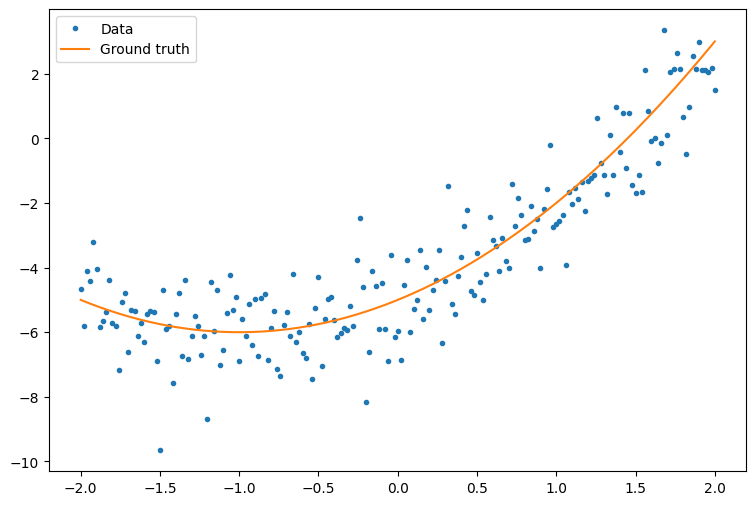

In [33]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

创建具有随机初始化权重和偏差的二次模型：

In [34]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])
  
  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

首先，在训练前观察您的模型的性能：

In [35]:
quad_model = Model()

In [36]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

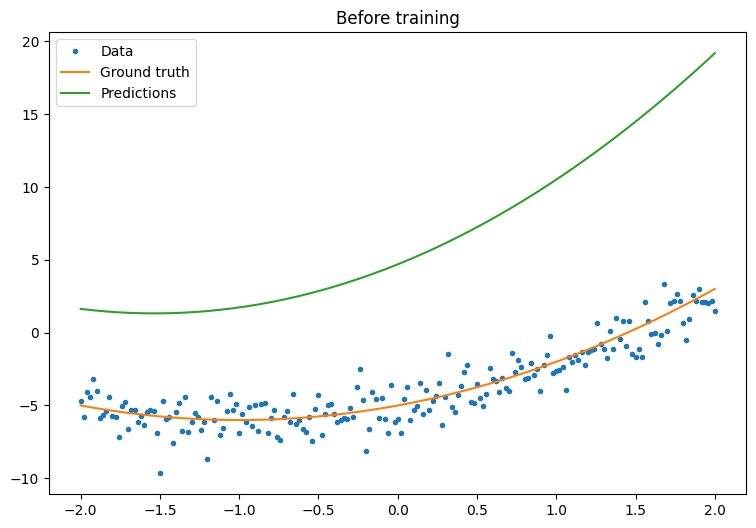

In [37]:
plot_preds(x, y, f, quad_model, 'Before training')

现在，为您的模型定义损失：

鉴于此模型的作用是预测连续值，因此均方误差 (MSE) 是损失函数的不错选择。给定一个预测向量 $\hat{y}$ 和一个真实目标向量 $y$，MSE 被定义为预测值与基准值之间平方差的平均值。

$MSE = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}_i -y_i)^2$

In [38]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

为模型编写一个基本训练循环。此循环将利用 MSE 损失函数及其相对于输入的梯度来迭代更新模型的参数。使用 mini-batch 进行训练可以提供内存效率和更快的收敛速度。`tf.data.Dataset` API 具有用于批处理和重排的实用函数。

In [39]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 57.023
Mean squared error for step 10: 9.908
Mean squared error for step 20: 4.178
Mean squared error for step 30: 2.158
Mean squared error for step 40: 1.459
Mean squared error for step 50: 1.218
Mean squared error for step 60: 1.131
Mean squared error for step 70: 1.102
Mean squared error for step 80: 1.094
Mean squared error for step 90: 1.091




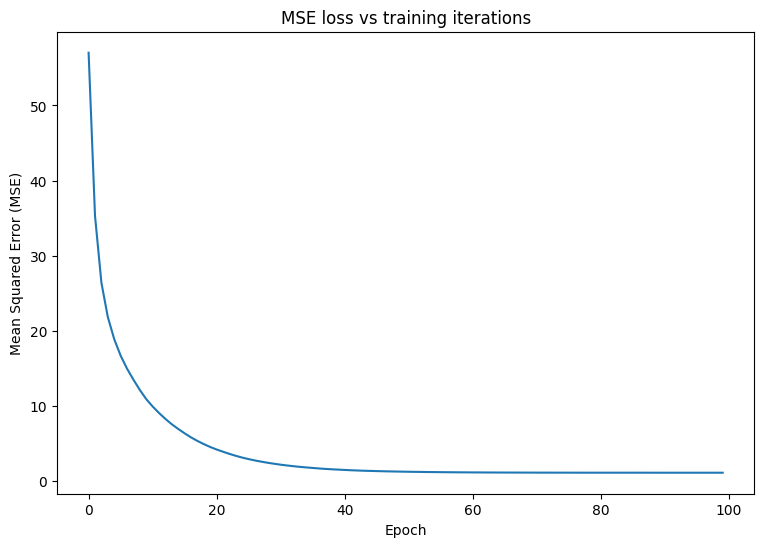

In [40]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g, v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

现在，观察模型在训练后的性能：

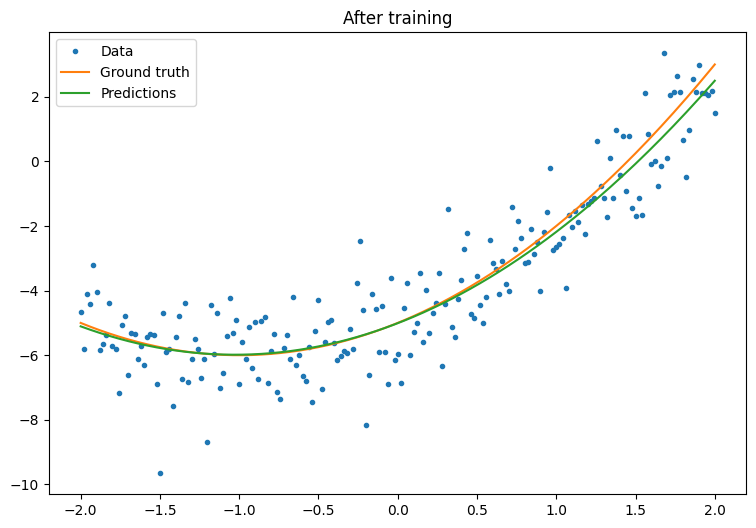

In [41]:
plot_preds(x, y, f, quad_model, 'After training')

成功了，但请记住，`tf.keras` 模块中提供了常见训练实用工具的实现。因此在您自己动手编写之前，请优先考虑使用现成的内容。首先，`Model.compile` 和 `Model.fit` 方法为您实现了训练循环：

首先，使用 `tf.keras.Sequential` 在 Keras 中创建序贯模型。最简单的 Keras 层之一是密集层，可以使用 `tf.keras.layers.Dense` 进行实例化。密集层能够学习 $\mathrm{Y} = \mathrm{W}\mathrm{X} + \vec{b}$ 形式的多维线性关系。要学习 $w_1x^2 + w_2x + b$ 形式的非线性方程，密集层的输入应当是一个以 $x^2$ 和 $x$ 为特征的数据矩阵。lambda 层 `tf.keras.layers.Lambda` 可用于执行这种堆叠转换。

In [42]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [44]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save(temp_dir/'./my_new_model.keras')

训练后观察 Keras 模型的性能：

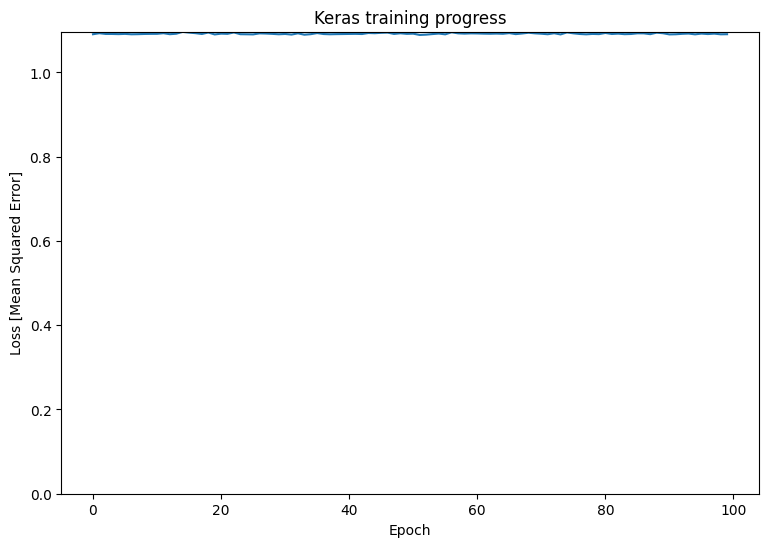

In [45]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

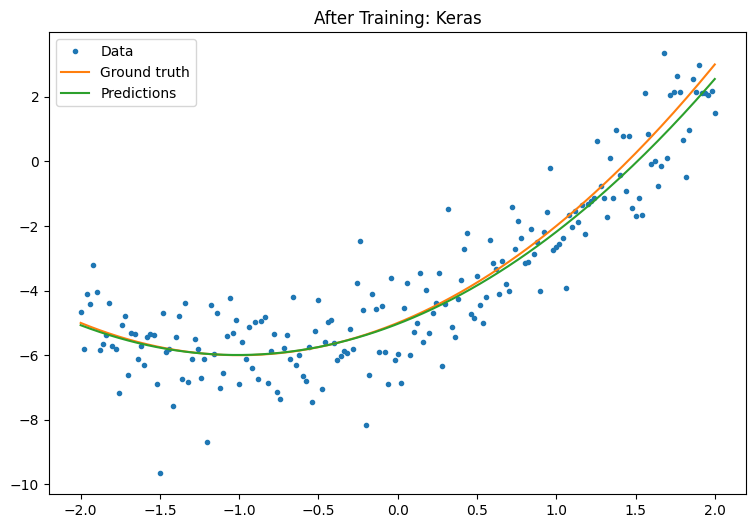

In [46]:
plot_preds(x, y, f, new_model, 'After Training: Keras')

请参阅[基本训练循环](basic_training_loops.ipynb)和 [Keras 指南](https://tensorflow.google.cn/guide/keras)，了解更多详细信息。